In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

C:\Users\91913\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


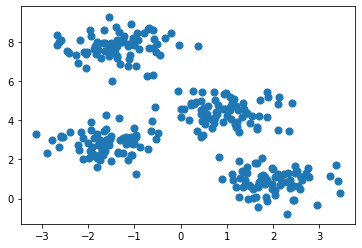

In [4]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,
                   cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

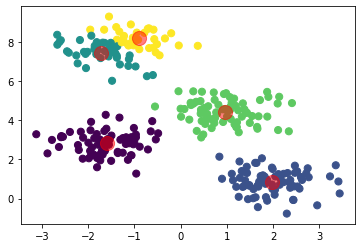

In [6]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
kmeans = KMeans(n_clusters = 10,random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

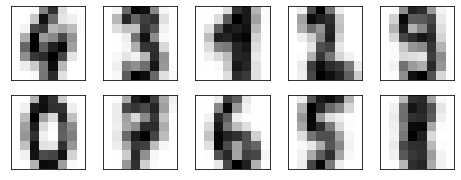

In [9]:
fig,ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi,centers in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(centers , interpolation='nearest',cmap = plt.cm.binary)

In [10]:
import numpy as np
from scipy.stats import mode

labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]

In [11]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(digits.target,labels)
mat

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 148,  13,   0,   0,   0,   3,   8,   2],
       [  0,   0,   1, 155,   0,   2,   0,   7,   7,  11],
       [  0,   7,   0,   0, 163,   0,   0,   7,   4,   0],
       [  0,   0,   0,   1,   2, 136,   1,   0,   0,  42],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177,   2,   0],
       [  0,   6,   3,   4,   0,   4,   2,   5, 102,  48],
       [  0,  20,   0,   6,   0,   6,   0,   7,   2, 139]], dtype=int64)

In [12]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\iris.csv")

In [13]:
df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
X=df.iloc[:,[0,1,2,3]].values

In [15]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

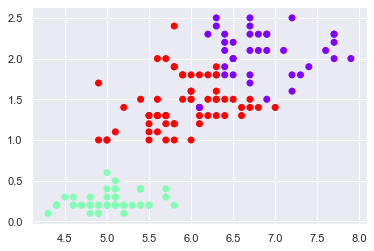

In [17]:
plt.scatter(X[:,0],X[:,3],c=y_kmeans,cmap='rainbow')

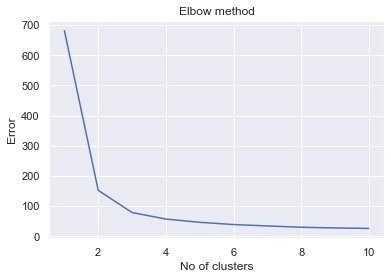

In [22]:
Error=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(X)
    #kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Data with Mall_Customers

In [36]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\Mall_Customers.csv")

In [37]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [38]:
percnan=pd.DataFrame([(col,df[col].isna().mean()*100)for col in df],columns=["Features","percentage"])

In [39]:
percnan

,Features,percentage
0,CustomerID,0.0
1,Gender,0.0
2,Age,0.0
3,Annual Income (k$),0.0
4,Spending Score (1-100),0.0


In [40]:
gd=pd.get_dummies(df['Gender'])
gd

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [41]:
df=df.drop(['CustomerID','Gender'],axis=1)

In [42]:
df=pd.concat([gd,df],axis=1)

In [43]:
df.head()

,Female,Male,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39
1,0,1,21,15,81
2,1,0,20,16,6
3,1,0,23,16,77
4,1,0,31,17,40


In [44]:
X=df.iloc[:,[0,1,2,3]].values

In [45]:
kmeans=KMeans(n_clusters=3)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1
 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 0 2 2 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[ 0.5326087 ,  0.4673913 , 34.34782609, 82.82608696],
       [ 0.64      ,  0.36      , 28.36      , 31.44      ],
       [ 0.53448276,  0.46551724, 55.03448276, 50.34482759]])

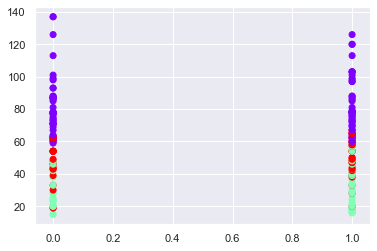

In [46]:
plt.scatter(X[:,0],X[:,3],c=y_kmeans,cmap='rainbow')

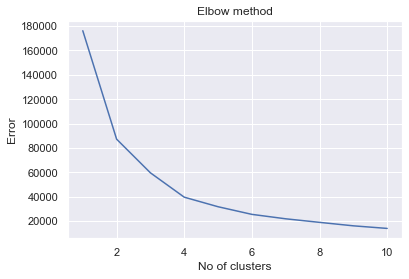

In [47]:
Error=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i).fit(X)
    #kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()